In [99]:
import numpy as np
import csv,os
import pandas as pd
import collections as col
import matplotlib.pyplot as pl
pd.set_option("display.max_columns",100)

# Parameters:
min_plays = 10
nfl = pd.read_csv('NFLPlaybyPlay2015.csv', index_col = False, low_memory=False)
nfl.rename(columns = {nfl.columns[0] : 'playid'}, inplace=True)
nfl.rename(columns = {nfl.columns[nfl.columns.get_loc('Yards.Gained')] : 'YardsGained' }, inplace=True)
nfl.rename(columns = {nfl.columns[nfl.columns.get_loc('Penalty.Yards')] : 'PenaltyYards'}, inplace=True)
#print(nfl.keys())


Pass_or_Rush = nfl[['PassAttempt', 'RushAttempt','YardsGained','Receiver','Rusher','Passer','posteam','down','ydstogo','PlayTimeDiff']]

In [101]:
%run nfl_structures.ipynb

{'ball_position': 0, 'new_drive': True, 'play_clock': 3600, 'score': {'team1': 0, 'team2': 0}, 'possession': 'NE', 'ydstogo': 10, 'down': 1}


In [102]:
Pass_attempts = sum([Pass_or_Rush.PassAttempt[i] for i in range(len(Pass_or_Rush))])
Pass_yards = sum([Pass_or_Rush.PassAttempt[i]*Pass_or_Rush.YardsGained[i] for i in range(len(Pass_or_Rush))])
Rush_attempts = sum([Pass_or_Rush.RushAttempt[i] for i in range(len(Pass_or_Rush))])
Rush_yards =sum([Pass_or_Rush.RushAttempt[i]*Pass_or_Rush.YardsGained[i] for i in range(len(Pass_or_Rush))])

print("Over entire dataset:","\n", "Yards per pass:", Pass_yards/Pass_attempts,", ", "Yards per rush:",Rush_yards/Rush_attempts)

Over entire dataset: 
 Yards per pass: 7.11328908782 ,  Yards per rush: 4.31436417728


In [103]:
Passes = Pass_or_Rush[Pass_or_Rush.PassAttempt == 1]
Rushes = Pass_or_Rush[Pass_or_Rush.RushAttempt == 1]

Rusher_data = col.defaultdict(list)
len(Rushes)
for i in Rushes.index:
    temprush = {'YardsGained':Rushes.loc[i,'YardsGained'], 'posteam':Rushes.loc[i,'posteam'], 'down':Rushes.loc[i,'down'], 'ydstogo' : Rushes.loc[i,'ydstogo']}
    Rusher_data[Rushes.loc[i,'Rusher']].append(temprush)
    
Passer_data = col.defaultdict(list)
len(Passes)
for i in Passes.index:
    tempPass = {'YardsGained':Passes.loc[i,'YardsGained'], 'posteam':Passes.loc[i,'posteam'], 'down':Passes.loc[i,'down'], 'ydstogo' : Passes.loc[i,'ydstogo']}
    Passer_data[Passes.loc[i,'Passer']].append(tempPass)

In [104]:
Rusher_stats = col.defaultdict(lambda: col.defaultdict(float))
max_std = 0
min_std = 100
for Rusher in Rusher_data:
    Rush_lengths = [rush['YardsGained'] for rush in Rusher_data[Rusher]]
    total_yards = sum(Rush_lengths)
    attempts = len(Rusher_data[Rusher])
    std = np.std(Rush_lengths)
#    print(std)
    if attempts >= min_plays:
        Rusher_stats[Rusher] = {'total_yards':total_yards,'attempts':attempts,'avg_yards':total_yards/attempts, 'std':std}
        pl.scatter(std,total_yards/attempts)
        if std > max_std:
            max_std=std
            max_std_Rusher = Rusher
        if std < min_std:
            min_std = std
            min_std_Rusher = Rusher
#pl.show()
#print(max_std_Rusher , ", Rush attempts:" , len(Rusher_data[max_std_Rusher]), "\n" ,"Max pass yards:", max([Rush['YardsGained'] for Rush in Rusher_data[max_std_Rusher]]) , " Min pass yards:" ,  min([Rush['YardsGained'] for Rush in Rusher_data[max_std_Rusher]]) , "avg Rush yrds:", Rusher_stats[max_std_Rusher]['avg_yards'], "std:", np.std([Rush['YardsGained'] for Rush in Rusher_data[max_std_Rusher]]))
#print(min_std_Rusher , ", Rush attempts:" , len(Rusher_data[min_std_Rusher]), "\n" ,"Max pass yards:", max([Rush['YardsGained'] for Rush in Rusher_data[min_std_Rusher]]) , " Min pass yards:" ,  min([Rush['YardsGained'] for Rush in Rusher_data[min_std_Rusher]]) , "avg Rush yrds:", Rusher_stats[min_std_Rusher]['avg_yards'], "std:", np.std([Rush['YardsGained'] for Rush in Rusher_data[min_std_Rusher]]))

Passer_stats = col.defaultdict(lambda: col.defaultdict(float))
max_std = 0
min_std = 100
for Passer in Passer_data:
    Pass_lengths = [Rush['YardsGained'] for Rush in Passer_data[Passer]]
    total_yards = sum(Pass_lengths)
    attempts = len(Passer_data[Passer])
    std = np.std(Pass_lengths)
#    print(std)
    if attempts >= min_plays:
        Passer_stats[Passer] = {'total_yards':total_yards,'attempts':attempts,'avg_yards':total_yards/attempts, 'std':std}
        pl.scatter(std,total_yards/attempts)
        if std > max_std:
            max_std=std
            max_std_Passer = Passer
        if std < min_std:
            min_std = std
            min_std_Passer = Passer
#pl.show()
#print(max_std_Passer , ", Pass attempts:" , len(Passer_data[max_std_Passer]), "\n" ,"Max pass yards:", max([Pass['YardsGained'] for Pass in Passer_data[max_std_Passer]]) , " Min pass yards:" ,  min([Pass['YardsGained'] for Pass in Passer_data[max_std_Passer]]) , "avg Pass yrds:", Passer_stats[max_std_Passer]['avg_yards'], "std:", np.std([Pass['YardsGained'] for Pass in Passer_data[max_std_Passer]]))
#print(min_std_Passer , ", Pass attempts:" , len(Passer_data[min_std_Passer]), "\n" ,"Max pass yards:", max([Pass['YardsGained'] for Pass in Passer_data[min_std_Passer]]) , " Min pass yards:" ,  min([Pass['YardsGained'] for Pass in Passer_data[min_std_Passer]]) , "avg Pass yrds:", Passer_stats[min_std_Passer]['avg_yards'], "std:", np.std([Pass['YardsGained'] for Pass in Passer_data[min_std_Passer]]))

7.86186186186 10.6243029301 666


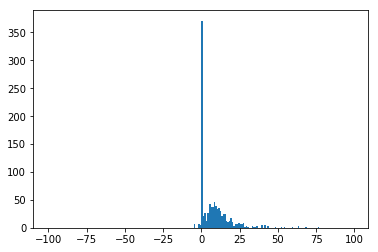

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0045045045045045045, 0.0, 0.0015015015015015015, 0.0045045045045045045, 0.0045045045045045045, 0.36486486486486486, 0.024024024024024024, 0.02252252252252252, 0.018018018018018018, 0.025525525525525526, 0.04054054054054054, 0.04354354354354354, 0.04054054054054054, 0.046546546546546545, 0.03753753753753754, 0.03453453453453453, 0.036036036036036036, 0.03453453453453453, 0.021021021021021023, 0.02252252252252252, 0.013513513513513514, 0.016516516516516516, 0.009009009009009009, 0.012012012012012012, 0.0165165165165165

In [107]:
brady_rushes = [Rush['YardsGained'] for Rush in Rusher_data['T.Brady']]
brady_passes = [Pass['YardsGained'] for Pass in Passer_data['T.Brady']]
total_yards_Passer = sum(brady_passes)

print(total_yards_Passer/len(Passer_data['T.Brady']), np.std([Pass['YardsGained'] for Pass in Passer_data['T.Brady']]),len(Passer_data['T.Brady']))

brady_total_passes = len(Passer_data['T.Brady'])
brady_passes_dist_counter = col.Counter(brady_passes)

brady_passes_dist_list = [0]*201

for yard in brady_passes_dist_counter:
    brady_passes_dist_list[yard+100] = float(brady_passes_dist_counter[yard])  
    
brady_passes_probability_list = [count/brady_total_passes for count in brady_passes_dist_list]
#print(brady_passes_probability_list, sum(brady_passes_probability_list))
#pl.hist([Pass['YardsGained'] for Pass in Passers['T.Brady']], bins=range(-100,100))
#pl.show()
simulated_brady_passes = []
for i in range(1000):
    pass_length = np.random.choice(np.arange(-100,101), p = brady_passes_probability_list)
    simulated_brady_passes.append(pass_length)
    
pl.hist(simulated_brady_passes, bins=range(-100,100))
pl.show()

print(brady_passes_probability_list)